In [109]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [110]:
import zipfile
zip_path = r'C:\Users\vivek\OneDrive\Desktop\Machine Learning(IA)\ML_Assignments\Datasets\statlog+australian+credit+approval.zip'

# Open the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # List all files in the zip
    print(zip_ref.namelist())


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    with zip_ref.open('australian.dat') as file:
        df = pd.read_csv(file, header=None, sep=r'\s+')

print(df.head())




['australian.doc', 'australian.dat', 'Index']
   0      1      2   3   4   5      6   7   8   9   10  11   12    13  14
0   1  22.08  11.46   2   4   4  1.585   0   0   0   1   2  100  1213   0
1   0  22.67   7.00   2   8   4  0.165   0   0   0   0   2  160     1   0
2   0  29.58   1.75   1   4   4  1.250   0   0   0   1   2  280     1   0
3   0  21.67  11.50   1   5   3  0.000   1   1  11   1   2    0     1   1
4   1  20.17   8.17   2   6   4  1.960   1   1  14   0   2   60   159   1


In [111]:

column_names = [
    'A1',  'A2',  'A3',  'A4',  'A5',
    'A6',  'A7',  'A8',  'A9',  'A10',
    'A11', 'A12', 'A13', 'A14', 'Class'
]

df.columns = column_names
print(df.head())


   A1     A2     A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  A13   A14  \
0   1  22.08  11.46   2   4   4  1.585   0   0    0    1    2  100  1213   
1   0  22.67   7.00   2   8   4  0.165   0   0    0    0    2  160     1   
2   0  29.58   1.75   1   4   4  1.250   0   0    0    1    2  280     1   
3   0  21.67  11.50   1   5   3  0.000   1   1   11    1    2    0     1   
4   1  20.17   8.17   2   6   4  1.960   1   1   14    0    2   60   159   

   Class  
0      0  
1      0  
2      0  
3      1  
4      1  


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    float64
 7   A8      690 non-null    int64  
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    int64  
 14  Class   690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


In [113]:
df.isnull().sum()

A1       0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
A11      0
A12      0
A13      0
A14      0
Class    0
dtype: int64

In [114]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [115]:
X

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12


In [116]:
y

0      0
1      0
2      0
3      1
4      1
      ..
685    1
686    0
687    1
688    1
689    1
Name: Class, Length: 690, dtype: int64

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [119]:
# Logistic Classifier
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

# Evaluate accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

start_time = time.time() 
end_time = time.time()  
print(f"Run Time: {end_time - start_time:.4f} seconds")

Accuracy: 0.88
Confusion Matrix:
[[78  9]
 [ 8 43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90        87
           1       0.83      0.84      0.83        51

    accuracy                           0.88       138
   macro avg       0.87      0.87      0.87       138
weighted avg       0.88      0.88      0.88       138

Run Time: 0.0000 seconds


In [120]:
# SVM classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_scaled, y_train)
y_pred1 = svc.predict(X_test_scaled)

#  Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred1))

# Classification report (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred1))

start_time = time.time() 
end_time = time.time()  
print(f"Run Time: {end_time - start_time:.4f} seconds")



Accuracy: 0.85
Confusion Matrix:
[[76 11]
 [10 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88        87
           1       0.79      0.80      0.80        51

    accuracy                           0.85       138
   macro avg       0.84      0.84      0.84       138
weighted avg       0.85      0.85      0.85       138

Run Time: 0.0000 seconds


Accuracy: 0.86
Confusion Matrix:
[[77 10]
 [10 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        87
           1       0.80      0.80      0.80        51

    accuracy                           0.86       138
   macro avg       0.84      0.84      0.84       138
weighted avg       0.86      0.86      0.86       138

Confusion Matrix:
[[77 10]
 [10 41]]
Run Time: 0.0000 seconds


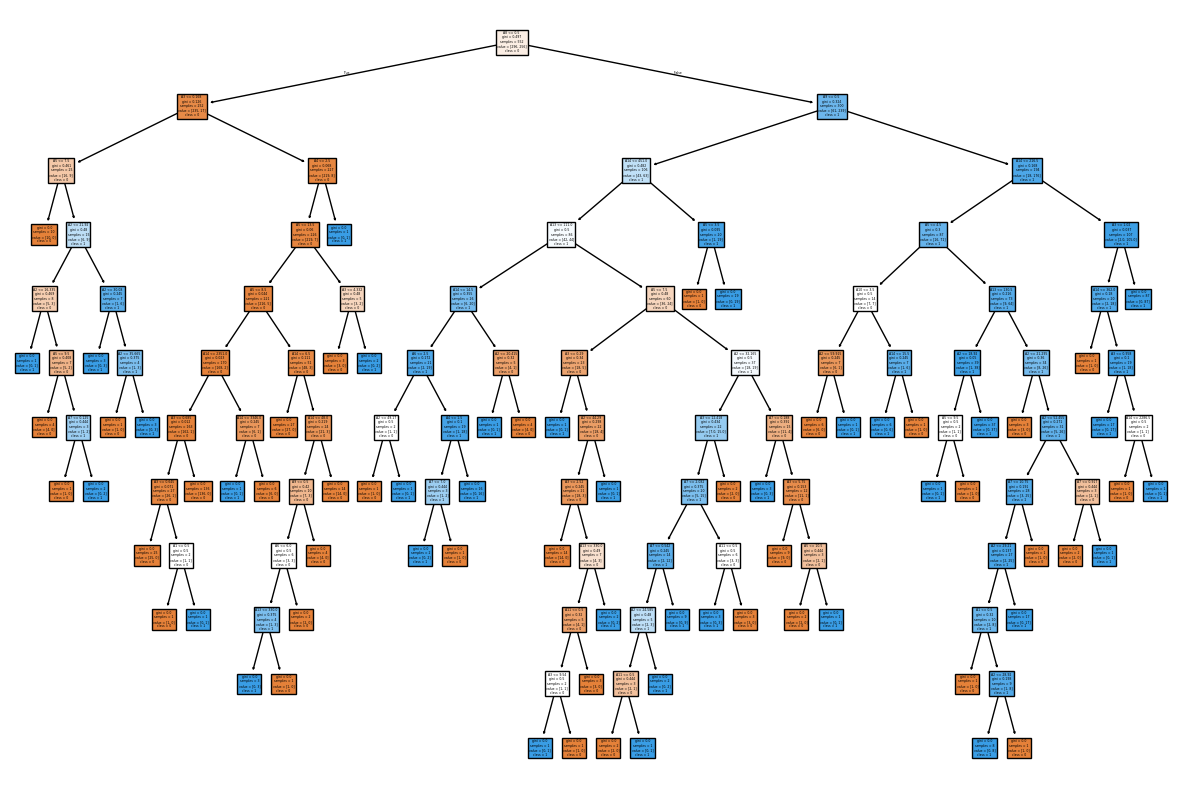

In [121]:
# Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred2 = dt.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred2))

# Classification report (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred2))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred2))

start_time = time.time() 
end_time = time.time()  
print(f"Run Time: {end_time - start_time:.4f} seconds")


from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()

In [122]:
# Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)
adaboost = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, random_state=42)

# Train the AdaBoost model
adaboost.fit(X_train, y_train)
y_pred4 = adaboost.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred4)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred4))

# Classification report (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred4))

start_time = time.time() 
end_time = time.time()  
print(f"Run Time: {end_time - start_time:.4f} seconds")

c:\Users\vivek\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.89
Confusion Matrix:
[[79  8]
 [ 7 44]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        87
           1       0.85      0.86      0.85        51

    accuracy                           0.89       138
   macro avg       0.88      0.89      0.88       138
weighted avg       0.89      0.89      0.89       138

Run Time: 0.0000 seconds


In [123]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_scaled, y_train)
y_pred5 = xgb_classifier.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred5)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred5))

# Classification report (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred5))

start_time = time.time() 
end_time = time.time()  
print(f"Run Time: {end_time - start_time:.4f} seconds")


Accuracy: 0.86
Confusion Matrix:
[[77 10]
 [ 9 42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89        87
           1       0.81      0.82      0.82        51

    accuracy                           0.86       138
   macro avg       0.85      0.85      0.85       138
weighted avg       0.86      0.86      0.86       138

Run Time: 0.0000 seconds


In [124]:
# Import libraries
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Initialize the CatBoost Classifier
catboost = CatBoostClassifier(
    iterations=1000,              # Total boosting iterations
    depth=6,                      # Depth of each tree
    learning_rate=0.1,            # Learning rate
    loss_function='Logloss',     # Loss function for binary classification
    cat_features=[],             # Add indices of categorical features if any
    random_seed=42,              # For reproducibility
    verbose=200                   # Output training progress every 200 iterations
)

# Train the model with early stopping
catboost.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),           # Validation set for early stopping
    early_stopping_rounds=50             # Stop training if no improvement after 50 rounds
)

# Make predictions
y_pred = catboost.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


0:	learn: 0.6067742	test: 0.6147600	best: 0.6147600 (0)	total: 3.25ms	remaining: 3.25s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.3284378337
bestIteration = 42

Shrink model to first 43 iterations.
Accuracy: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89        87
           1       0.83      0.78      0.81        51

    accuracy                           0.86       138
   macro avg       0.86      0.85      0.85       138
weighted avg       0.86      0.86      0.86       138

Confusion Matrix:
 [[79  8]
 [11 40]]
